# Import Packages

- First, let's run the cell below to import packages and the last cell with [Helper Functions](#helper).
- Back from Helper Function
<a id='helper_back'></a>

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Problem 1: Gas rising from below
### 1) The sediment stack:
#### (a)

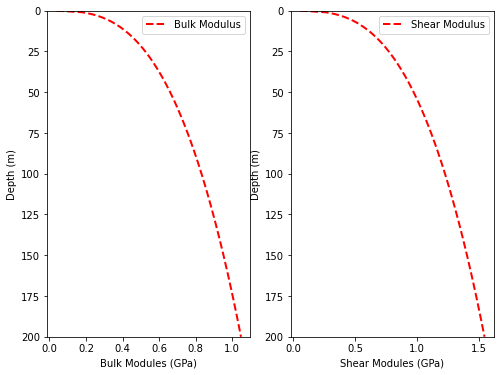

In [289]:
'''
    psi to GPa refer to https://earthscience.stackexchange.com/questions/2992/why-is-the-lithostatic-pressure-gradient-1-psi-ft-how-is-it-derived-from-densit
'''
K0 = 36.6  # Bulk Modulus (GPa)
G0 = 45.0  # Shear Modulus (GPa)
phi = 0.36 # Porosity

# Use an appropriate empirical model for calculating coordination number.
C0 = 5.3
phi_0 = 0.384
Cn = C0 +9.7*((phi_0 - phi)**0.48)  

# Get pressure with depth
P0 = 0.0          # Gauge pressure (GPa) Gauge pressure will be assumed, therefore P0 will be 0 psig since the datum will be selected to be at the surface of the earth
depth_0 = 0.01     # Surface depth (m)
depth_max = 200.0 # max depth (m)
depth_array = np.linspace(depth_0, depth_max, num=200)
sigma = P0 + 1/0.3048 * 6.8947572932e-6 * depth_array

# Hertz-Mindlin model
Khm, Ghm = hertz_mindlin(K0, G0, sigma, phi, Cn)

# Plot bulk modulus as a function of depth
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs[0].plot(Khm, depth_array,  linestyle='--', color='red',linewidth=2, alpha=1,label='Bulk Modulus')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
axs[0].set_xlabel('Bulk Modules (GPa)') 
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

# Plot shear modulus as a function of depth
axs[1].plot(Ghm, depth_array,  linestyle='--', color='red',linewidth=2, alpha=1,label='Shear Modulus')
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_ylim(0, 200) # axs[1].set_xlim(0, 200)
axs[1].set_xlabel('Shear Modules (GPa)')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()
fig.savefig('./p1-1-a.pdf', dpi=800, format='pdf')


#### (b)

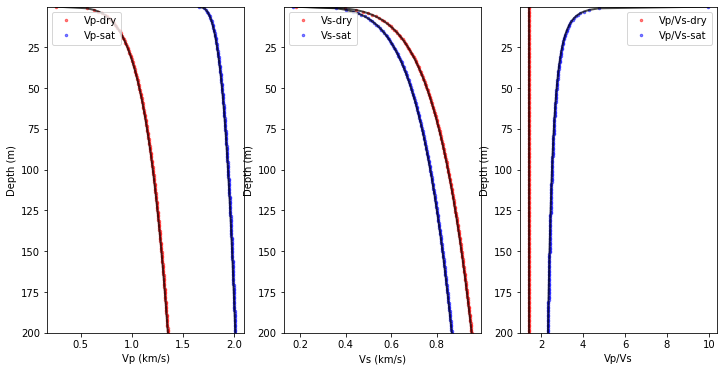

In [290]:
Kw = 2.2  # Fresh Water Bulk Modulus (GPa)
Uw = 0.0  # Fresh Water Shear Modulus (GPa)
DensityWater = 1.0
Kqtz = 36.6
Uqtz =  45.0
DensityQuartz = 2.65
Porosity = 0.36

# 1.Compute Vp & Vs
DensityDry = (1-Porosity)*DensityQuartz
Vp = np.power((Khm+(4/3)*Ghm)/DensityDry, 1/2)
Vs = np.power(Ghm/DensityDry, 1/2)
num = len(depth_array)

# 2.Estimate or assume constant the mineral bulk modulus and the in situ fluid bulk modulus
kmin = Kqtz*np.ones(num)
umin = Uqtz*np.ones(num)
kf = Kw*np.ones(num)
uf = Uw*np.ones(num)

# 3.Calculate kdry
kdry = Khm

# 4.Compute new fluid (water) bulk modulus using Reuss bounds for a mixture of fluids
kf2 = Kw*np.ones(num)

# 5.Compute saturated rock bulk modulus
ksat2 = gassmann_ksat(kdry, kmin, kf2, Porosity)

# 6.Employ shear modulus equivalence ????
usat2 = Ghm

# 7.Transform density
density2 = (1-Porosity)*DensityQuartz + Porosity*DensityWater

# 8.Compute the new velocities
Vp2 = np.power((ksat2+4/3*usat2)/density2, 1/2)
Vs2 = np.power(usat2/density2, 1/2)
Iwp = Vp2*density2
Iws = Vs2*density2

# Plot Vp with depth
fig, axs = plt.subplots(1, 3,gridspec_kw=dict(width_ratios=[1,1, 1]), figsize=(12, 6))
axs[0].plot(Vp, depth_array,'.',markersize=5, color='red', alpha=0.5,label='Vp-dry')
axs[0].plot(Vp, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[0].plot(Vp2, depth_array,'.',markersize=5, color='blue', alpha=0.5,label='Vp-sat')
axs[0].plot(Vp2, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[0].legend(loc='upper left',fontsize=10, shadow=False)
# axs[0].set_xlim(2.2, 2.8)
axs[0].set_ylim(depth_array[0], depth_array[-1])
axs[0].set_xlabel('Vp (km/s)')
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

# Plot Vs with depth
axs[1].plot(Vs, depth_array,'.',markersize=5, color='red', alpha=0.5,label='Vs-dry')
axs[1].plot(Vs, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[1].plot(Vs2, depth_array,'.',markersize=5, color='blue', alpha=0.5,label='Vs-sat')
axs[1].plot(Vs2, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[1].legend(loc='upper left',fontsize=10, shadow=False)
# axs[1].set_xlim(1.0, 1.25)
axs[1].set_ylim(depth_array[0], depth_array[-1])
axs[1].set_xlabel('Vs (km/s)')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()

# Plot Density with depth
axs[2].plot(Vp/Vs, depth_array,'.',markersize=5, color='red', alpha=0.5,label='Vp/Vs-dry')
axs[2].plot(Vp/Vs, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[2].plot(Vp2/Vs2, depth_array,'.',markersize=5, color='blue', alpha=0.5,label='Vp/Vs-sat')
axs[2].plot(Vp2/Vs2, depth_array, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[2].legend(loc='upper right',fontsize=10, shadow=False)
# axs[2].set_xlim(1.90, 2.15)
axs[2].set_ylim(depth_array[0], depth_array[-1])
axs[2].set_xlabel('Vp/Vs')
axs[2].set_ylabel('Depth (m)')
axs[2].invert_yaxis()
fig.savefig('./p1-1-b.pdf', dpi=800, format='pdf')

### 2) Partial gas saturation:
#### (a)

In [299]:
G = 0.56
depth = 100  # in m
P = P0 + 1/0.3048*6.8947572932e-6*depth # in GPa 
d = 100
tg = 0.02
KG, pG = gas_bulk(G,P,d,tg)
print('KG = ', KG)

KG =  0.002986930151536351


#### (b)

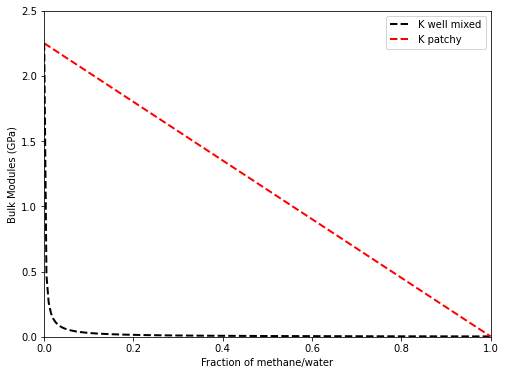

In [300]:
water_density = 1e3 # in kg/m3
V_water = 1500 # in m/s
Km = KG
Kw = water_density*V_water**2*1e-9 # in GPa
S = np.linspace(0, 1, num=200)
K_well_mixed, K_patchy = gassmann_mixed_fluid(Km, Kw, S)

fig, axs = plt.subplots(1,1, figsize=(8, 6))
axs.plot(S, K_well_mixed,  linestyle='--', color='black',linewidth=2, alpha=1,label='K well mixed')
axs.plot(S, K_patchy,  linestyle='--', color='red',linewidth=2, alpha=1,label='K patchy')
axs.legend(loc='upper right',fontsize=10, shadow=False)
axs.set_xlim(0, 1)
axs.set_ylim(0, 2.5)  
axs.set_xlabel('Fraction of methane/water') 
axs.set_ylabel('Bulk Modules (GPa)')
fig.savefig('./p1-2-b.pdf', dpi=800, format='pdf')

#### (c)

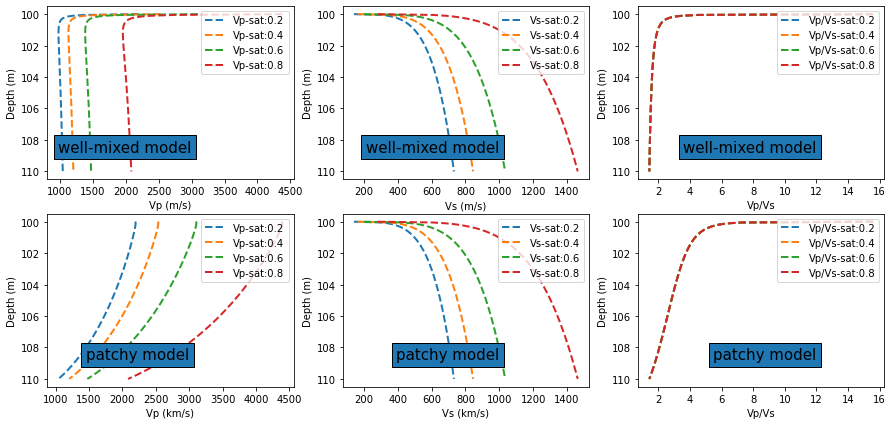

In [293]:
Fraction_methane_water = np.array([0.2, 0.4, 0.6, 0.8])
water_density = 1e3 # in kg/m3
methane_density = pG*1e3 # in kg/m3
depths = np.linspace(100, 110, num=200)
porosity = 0.36
quartz_density = 2.65*1e3
Kqtz = 36.6
Kdry = Khm
Udry = Ghm

#############
K_mixed = K_well_mixed 
vp2, vs2, vp_vs_ratio, density_mixed = getV_gassmann_mixed_fluid(Fraction_methane_water, 
                                                                 water_density, 
                                                                 methane_density, 
                                                                 quartz_density, 
                                                                 porosity,
                                                                 Kqtz, 
                                                                 K_mixed, 
                                                                 Kdry, 
                                                                 Udry)
Ip1 = vp2[0]*density_mixed[0]
Is1 = vs2[0]*density_mixed[0]

fig, axs = plt.subplots(2, 3, figsize=(15, 7))
for i in range(0,len(Fraction_methane_water)):
    axs[0,0].plot(vp2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp-sat:'+str(Fraction_methane_water[i]))
    axs[0,1].plot(vs2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vs-sat:'+str(Fraction_methane_water[i]))
    axs[0,2].plot(vp_vs_ratio[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp/Vs-sat:'+str(Fraction_methane_water[i]))
   
axs[0,0].text(3000, 108, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,1].text(1000, 108, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,2].text(12, 108, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,0].set_xlabel('Vp (m/s)') 
axs[0,0].set_ylabel('Depth (m)')
axs[0,0].invert_yaxis()
axs[0,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,1].set_xlabel('Vs (m/s)') 
axs[0,1].set_ylabel('Depth (m)')
axs[0,1].invert_yaxis()
axs[0,2].legend(loc='upper right',fontsize=10, shadow=False)
axs[0,2].set_xlabel('Vp/Vs') 
axs[0,2].set_ylabel('Depth (m)')
axs[0,2].invert_yaxis()
fig.savefig('./p1-2-c1.pdf', dpi=800, format='pdf')

#######
K_mixed = K_patchy
vp2, vs2, vp_vs_ratio, density_mixed = getV_gassmann_mixed_fluid(Fraction_methane_water, 
                                                                 water_density, 
                                                                 methane_density, 
                                                                 quartz_density, 
                                                                 porosity,
                                                                 Kqtz, 
                                                                 K_mixed, 
                                                                 Kdry, 
                                                                 Udry)
Ip2 = vp2[0]*density_mixed[0]
Is2 = vs2[0]*density_mixed[0]

for i in range(0,len(Fraction_methane_water)):
    axs[1,0].plot(vp2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp-sat:'+str(Fraction_methane_water[i]))
    axs[1,1].plot(vs2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vs-sat:'+str(Fraction_methane_water[i]))
    axs[1,2].plot(vp_vs_ratio[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp/Vs-sat:'+str(Fraction_methane_water[i]))

axs[1,0].text(3000, 108, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[1,1].text(1000, 108, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[1,2].text(12, 108, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[1,0].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,0].set_xlabel('Vp (km/s)') 
axs[1,0].set_ylabel('Depth (m)')
axs[1,0].invert_yaxis()
axs[1,1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,1].set_xlabel('Vs (km/s)') 
axs[1,1].set_ylabel('Depth (m)')
axs[1,1].invert_yaxis()
axs[1,2].legend(loc='upper right',fontsize=10, shadow=False)
axs[1,2].set_xlabel('Vp/Vs') 
axs[1,2].set_ylabel('Depth (m)')
axs[1,2].invert_yaxis()
fig.savefig('./p1-2-c1.pdf', dpi=800, format='pdf')


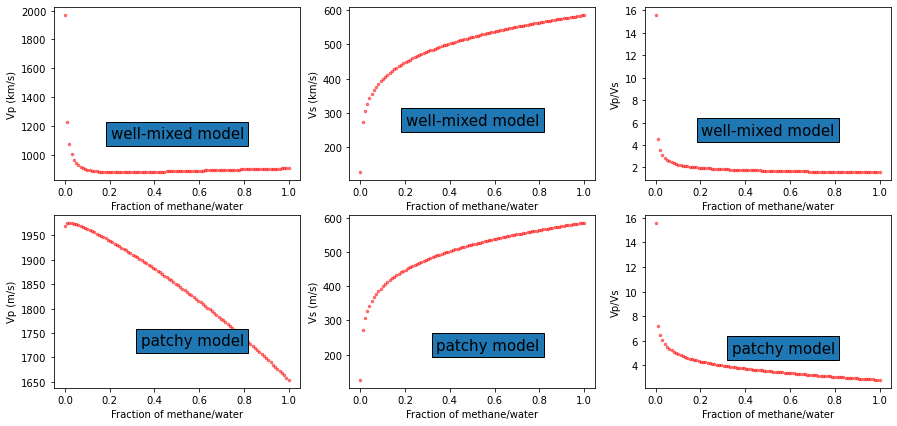

In [294]:
Fraction_methane_water = np.linspace(0.00, 1, num=100)
water_density = 1e3 # in kg/m3
methane_density = pG*1e3 # in kg/m3
depths = np.linspace(100, 110, num=200)
porosity = 0.36
quartz_density = 2.65*1e3
Kqtz = 36.6
Kdry = Khm
Udry = Ghm 

#########
K_mixed = K_well_mixed
vp2, vs2, vp_vs_ratio, density_mixed = getV_gassmann_mixed_fluid(Fraction_methane_water, 
                                                                 water_density, 
                                                                 methane_density, 
                                                                 quartz_density, 
                                                                 porosity,
                                                                 Kqtz, 
                                                                 K_mixed, 
                                                                 Kdry, 
                                                                 Udry)
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
for i in range(0,len(Fraction_methane_water)):
    axs[0,0].plot(Fraction_methane_water[i], vp2[1][i], '.',markersize=5, color='red', alpha=0.5)
    axs[0,1].plot(Fraction_methane_water[i], vs2[1][i], '.',markersize=5, color='red', alpha=0.5)
    axs[0,2].plot(Fraction_methane_water[i], vp_vs_ratio[1][i], '.',markersize=5, color='red', alpha=0.5)
    
axs[0,0].text(0.8, 1200, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,1].text(0.8, 300, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,2].text(0.8, 6, "well-mixed model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[0,0].set_xlabel('Fraction of methane/water') 
axs[0,0].set_ylabel('Vp (km/s)')
axs[0,1].set_xlabel('Fraction of methane/water') 
axs[0,1].set_ylabel('Vs (km/s)')
axs[0,2].set_xlabel('Fraction of methane/water') 
axs[0,2].set_ylabel('Vp/Vs')

#########
K_mixed = K_patchy
vp2, vs2, vp_vs_ratio, density_mixed = getV_gassmann_mixed_fluid(Fraction_methane_water, 
                                                                 water_density, 
                                                                 methane_density, 
                                                                 quartz_density, 
                                                                 porosity,
                                                                 Kqtz, 
                                                                 K_mixed, 
                                                                 Kdry, 
                                                                 Udry)

for i in range(0,len(Fraction_methane_water)):
    axs[1,0].plot(Fraction_methane_water[i], vp2[1][i], '.',markersize=5, color='red', alpha=0.5)
    axs[1,1].plot(Fraction_methane_water[i], vs2[1][i], '.',markersize=5, color='red', alpha=0.5)
    axs[1,2].plot(Fraction_methane_water[i], vp_vs_ratio[1][i], '.',markersize=5, color='red', alpha=0.5)
    
axs[1,0].text(0.8, 1750, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[1,1].text(0.8, 250, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))
axs[1,2].text(0.8, 6, "patchy model", size=15, ha="right", va="top",bbox=dict(boxstyle="square"))    
axs[1,0].set_xlabel('Fraction of methane/water') 
axs[1,0].set_ylabel('Vp (m/s)')
axs[1,1].set_xlabel('Fraction of methane/water') 
axs[1,1].set_ylabel('Vs (m/s)')
axs[1,2].set_xlabel('Fraction of methane/water') 
axs[1,2].set_ylabel('Vp/Vs')
fig.savefig('./p1-2-c2.pdf', dpi=800, format='pdf')

### 3) Reflections from the gassy zone
#### (a)

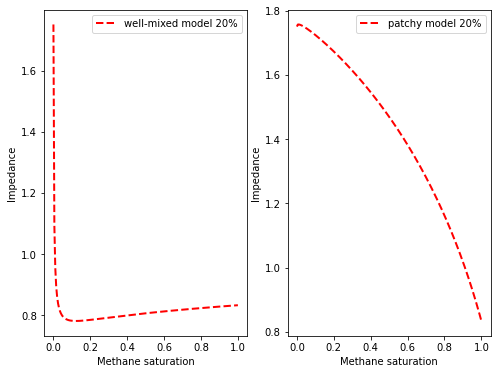

In [295]:
Fraction_methane_water = np.linspace(0.00, 1, num=200)
Imp1 = Ip1*1e-6; Imp2 = Ip2*1e-6
Ims1 = Is1*1e-6; Ims2 = Is2*1e-6

fig, axs = plt.subplots(1, 2, figsize=(8, 6))
axs[0].plot(Fraction_methane_water, Imp1,  linestyle='--', color='red',linewidth=2, alpha=1,label='well-mixed model 20%')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlabel('Methane saturation') 
axs[0].set_ylabel('Impedance')
axs[1].plot(Fraction_methane_water, Imp2,  linestyle='--', color='red',linewidth=2, alpha=1,label="patchy model 20%")
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_xlabel('Methane saturation')
axs[1].set_ylabel('Impedance')
fig.savefig('./p1-3-a.pdf', dpi=800, format='pdf')

#### (b)

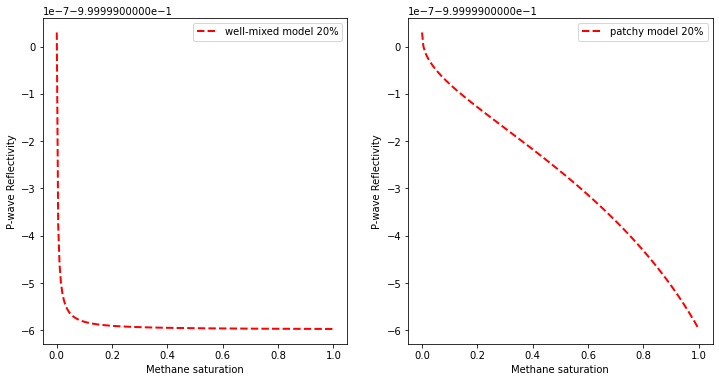

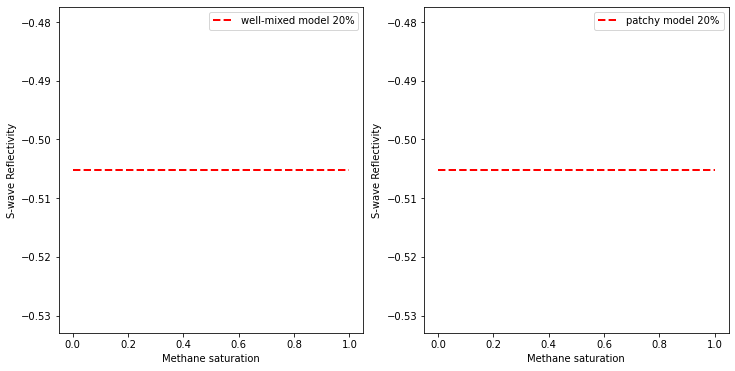

In [296]:
Imwp = Iwp*1e6
Imws = Iws*1e6
Rp1 = (Imp1-Imwp)/(Imp1+Imwp)
Rp2 = (Imp2-Imwp)/(Imp2+Imwp)
Rs1 = (Ims1-Iws)/(Ims1+Iws)
Rs2 = (Ims2-Iws)/(Ims2+Iws)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(Fraction_methane_water, Rp1,  linestyle='--', color='red',linewidth=2, alpha=1,label='well-mixed model 20%')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlabel('Methane saturation') 
axs[0].set_ylabel('P-wave Reflectivity')
axs[1].plot(Fraction_methane_water, Rp2,  linestyle='--', color='red',linewidth=2, alpha=1,label="patchy model 20%")
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_xlabel('Methane saturation')
axs[1].set_ylabel('P-wave Reflectivity')
fig.savefig('./p1-3-b1.pdf', dpi=800, format='pdf')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(Fraction_methane_water, Rs1,  linestyle='--', color='red',linewidth=2, alpha=1,label='well-mixed model 20%')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlabel('Methane saturation') 
axs[0].set_ylabel('S-wave Reflectivity')
axs[1].plot(Fraction_methane_water, Rs2,  linestyle='--', color='red',linewidth=2, alpha=1,label="patchy model 20%")
axs[1].legend(loc='upper right',fontsize=10, shadow=False)
axs[1].set_xlabel('Methane saturation')
axs[1].set_ylabel('S-wave Reflectivity')
fig.savefig('./p1-3-b2.pdf', dpi=800, format='pdf')

## Helper Functions
<a id='helper'></a>

In [245]:
def hertz_mindlin(K0, G0, sigma, phi_c, Cn, f=1):
    """
    Hertz-Mindlin model, a dry pack of spheres subject to a hydrostatic confining pressure. 
    
    Parameters
    ----------
        K0: float or array_like
            Mineral bulk modulus in GPa.
        G0: float or array_like
            Mineral shear modulus in GPa. 
        phi : float or array_like
            Porosity.        
        sigma : float
            Effective stress in GPa.   
        phi_c : float
            Critical porosity. 
        Cn : float
            Coordination number. 
        f : float, optional
            Shear modulus correction factor.
            f=1 for dry pack with perfect adhesion between particles. 
            f=0 for dry frictionless pack. 

    Returns
    -------
        Kdry : float or array_like
            Dry rock bulk modulus in GPa.
        Gdry : float or array_like 
            Dry rock shear modulus in GPa.
        
    References
    ----------
    .. [CT] Cooley, James W., and John W. Tukey, 1965, "An algorithm for the
            machine calculation of complex Fourier series," *Math. Comput.*
            19: 297-301.
            
    """
    pr0 =(3*K0-2*G0) / (6*K0+2*G0)     # poisson's ratio of mineral mixture
    Khm = (sigma*(Cn**2*(1 - phi_c)**2*G0**2) 
           / (18 * np.pi**2 * (1 - pr0)**2))**(1/3)
    Ghm = ((2+3*f-pr0*(1+3*f)) / (5*(2-pr0))) * ((sigma * (3 * Cn**2 * (1 - phi_c)**2 * G0**2) 
                / (2 * np.pi**2 * (1 - pr0)**2)))**(1/3)
        
    return Khm, Ghm


def gassmann_ksat(kdry, kmin, kf, phi):
    """
    Applies the direct Gassmann's equation to calculate the saturated rock
    bulk modulus from porosity and the dry-rock, mineral and fluid bulk moduli.
    
    Parameters
    ----------
        kdry : array
            Dry-rock bulk modulus.
        kmin : array
            Mineral bulk modulus.
        kf : array 
            Fluid bulk modulus.
        phi : array 
            Porosity.
            
    Returns
    -------
        ksat : array
            Saturated rock bulk modulus.
        
    """

    a = (1 - kdry/kmin)**2.0
    b = phi/kf + (1-phi)/kmin - (kdry/kmin**2.0)
    ksat = kdry + (a/b)

    return ksat


def gas_bulk(G,PGPa,d,tg):
    """
    Calculates the bulk modulus of a gas.

    Parameters
    ----------
        G : float or array_like
            Specific gravity of the gas
        P : float or array_like
            Pressure in GPa
        d : float or array_like 
            Depth in meters
        tg : float or array_like
            Thermal gradient
      
    Returns
    -------
        KG : float or array_like
            Adiabatic bulk modulus of the gas in GPa 
        pG : float or array_like
            Density of the gas in g/cm3
    
    References
    ----------
    .. [CT] RPH, pg. 341-342
    
    
    """
    # Step-1
    T = d*tg
    Ta = T + 273.15
    
    # Step-2
    P = PGPa/1e3  # in MPa
    Pr = P/(4.892-0.4048*G)
    Tr = Ta/(94.72+170.75*G)
    
    # Step-3
    R = 8.31441
    a = 0.03 + 0.00572*(3.5-Tr)**3
    b = 0.642*Tr - 0.007*Tr**4 - 0.52
    c = 0.109 * (3.85-Tr)**2
    d = np.exp(-(0.45+8*(0.56-1/Tr)**2)*Pr**1.2/Tr)
    E = c*d
    Z = (a*Pr) + b + E
    pG = 28.8*G*P/(Z*R*Ta)
    
    # Step-4
    m = np.exp(1.2*(-(0.45 + 8*(0.56-1/Tr)**2)*Pr**0.2/Tr))
    f = c*d*m + a
    y = 0.85 + 5.6/(Pr+2) + 27.1/(Pr+3.5)**2 - 8.7*np.exp(-(0.65*(Pr+1)))
    KG = P*y/(1-Pr*f/Z)
    KG = KG*1e3 # convert MPa to GPa
    
    return KG, pG


def gassmann_mixed_fluid(Km, Kw, S):
    """
    Combine Gassmann model and effective fluid model by mixing two (or more) fluid phases together, and saturated with combined fluid phase.
    For well-mixed fluid model, the Reuss average is used.
    For patchy fluid model, the Voigt average is used.
    
    Parameters
    ----------
        Km : float
            Bulk modules of methane in fluid state.
        Kw : float
            Bulk modules of water in fluid state.
        S : array_like
            Fraction of methane/water
      
    Returns
    -------
        K_well_mixed : float or array_like
            Bulk modulus of well-mixed fluid model.
        K_patchy : float or array_like
            Bulk modulus of patchy fluid model.
    
    """
    K_well_mixed = 1 / (S/Km + (1-S)/Kw)
    K_patchy = S*Km + (1-S)*Kw
    
    return K_well_mixed, K_patchy


def getV_gassmann_mixed_fluid(fraction_methane_water, water_density, methane_density, quartz_density, porosity,
                             Kqtz, K_mixed, Kdry, Udry):
    Vp=[]
    Vs=[]
    Vp_Vs_ratio=[]
    Density_mixed = (fraction_methane_water*methane_density) + (1-fraction_methane_water)*water_density
    for j in range(0,len(fraction_methane_water)):
        density_mixed = Density_mixed[j]
        for i in range(1,len(Kdry)):       
            K_fl = 1 / ((1-porosity)/Kqtz + porosity/K_mixed)
            a = (1 - Kdry[i]/Kqtz)**2
            b = porosity/K_fl + (1-porosity)/Kqtz - Kdry[i]/(Kqtz**2)
            Ksat2 = Kdry + a/b
            rho_sat = (1-porosity)*methane_density + porosity*density_mixed
            vp2 = np.power((Ksat2+(4*Udry[i]/3)) / rho_sat, 1/2)
            vs2 = np.power(Udry/rho_sat, 1/2)
            vp_vs_ratio = vp2/vs2
        
        Vp.append(vp2*1e4)
        Vs.append(vs2*1e4)
        Vp_Vs_ratio.append(vp_vs_ratio)
        
    return Vp, Vs, Vp_Vs_ratio,Density_mixed
    

-[Turn back!](#helper_back)

In [152]:
# def get_vp_vs(Fraction_methane_water, depths, usat2):
#     Vp=[]
#     Vs=[]
#     Vp_Vs_ratio=[]
#     for i in range(0,len(Fraction_methane_water)): 
#         G = 0.56
#         P = P0 + 1/0.3048*6.8947572932e-6*depths # in GPa 
#         tg = 0.02
#         KG, pG = gas_bulk(G,P,depths,tg)
#         methane_density = pG*1e3 # in kg/m3
#         water_density = 1e3 # in kg/m3
#         V_water = 1500 # in m/s
#         Km = KG
#         Kw = water_density*V_water**2*1e-9 # in GPa
#         S = Fraction_methane_water[i]
#         K_well_mixed, K_patchy = gassmann_mixed_fluid(Km, Kw, S)

#         ksat2 = K_well_mixed #, K_patchy
#         density_mixed = (S*methane_density) + (1-S)*water_density
#         vp2 = np.power((ksat2+4/3*usat2)/density_mixed, 1/2)
#         vs2 = np.power(usat2/density_mixed, 1/2)
#         vp_vs_ratio = vp2/vs2
#         Vp.append(vp2)
#         Vs.append(vs2)
#         Vp_Vs_ratio.append(vp_vs_ratio)
        
#     return Vp, Vs, Vp_Vs_ratio


# 2(c)

# Fraction_methane_water = np.array([0.25, 0.5, 0.75])
# depths = np.linspace(100, 110, num=10)
# usat2 = Ghm[100:110]
# vp2, vs2, vp_vs_ratio = get_vp_vs(Fraction_methane_water,depths, usat2)

# fig, axs = plt.subplots(2, 3, figsize=(15, 7))
# for i in range(0,len(Fraction_methane_water)):
#     axs[0,0].plot(vp2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp-'+str(Fraction_methane_water[i]))
#     axs[0,1].plot(vs2[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vs-'+str(Fraction_methane_water[i]))
#     axs[0,2].plot(vp_vs_ratio[i], depths,  linestyle='--',linewidth=2, alpha=1,label='Vp/Vs-'+str(Fraction_methane_water[i]))
    
# axs[0,0].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[0,0].set_xlabel('Vp (km/s)') 
# axs[0,0].set_ylabel('Depth (m)')
# axs[0,0].invert_yaxis()

# # Plot vs
# axs[0,1].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[0,1].set_xlabel('Vs (km/s)') 
# axs[0,1].set_ylabel('Depth (m)')
# axs[0,1].invert_yaxis()

# # Plot vp/vs
# axs[0,2].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[0,2].set_xlabel('Vp/Vs') 
# axs[0,2].set_ylabel('Depth (m)')
# axs[0,2].invert_yaxis()
# fig.savefig('./p1-2-c1.pdf', dpi=800, format='pdf')


# #####
# Fraction_methane_water = np.linspace(0.01, 0.99, num=100)
# depths = np.linspace(100, 100, num=1)
# usat2 = Ghm[100]
# vp2, vs2, vp_vs_ratio = get_vp_vs(Fraction_methane_water,depths, usat2)

# fig, axs = plt.subplots(2, 3, figsize=(15, 7))

# axs[0,0].plot(Fraction_methane_water, vp2, depths,  linestyle='--',linewidth=2, alpha=1,label='Vp-'+str(Fraction_methane_water[i]))
# axs[0,1].plot(Fraction_methane_water, vs2, depths,  linestyle='--',linewidth=2, alpha=1,label='Vs-'+str(Fraction_methane_water[i]))
# axs[0,2].plot(Fraction_methane_water, vp_vs_ratio, depths,  linestyle='--',linewidth=2, alpha=1,label='Vp/Vs-'+str(Fraction_methane_water[i]))
    
# # Plot vp with fraction
# axs[1,0].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[1,0].set_xlabel('Fraction of methane/water') 
# axs[1,0].set_ylabel('Vp (km/s)')

# # Plot vs with fraction
# axs[1,1].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[1,1].set_xlabel('Fraction of methane/water') 
# axs[1,1].set_ylabel('Vs (km/s)')

# # Plot vp/vs with fraction
# axs[1,2].legend(loc='upper right',fontsize=10, shadow=False)
# # axs[0].set_ylim(0, 200) # axs[0].set_xlim(0, 200)
# axs[1,2].set_xlabel('Fraction of methane/water') 
# axs[1,2].set_ylabel('Vp/Vs')

# fig.savefig('./p1-2-c2.pdf', dpi=800, format='pdf')
